In [1]:
import numpy as np
import cv2
import sys
from PIL import Image
from matplotlib import pyplot as plt
from os import path, makedirs
from importlib import reload
from stitching import Stitcher
from stitching import AffineStitcher

import stitching3 as st

In [2]:
reload(st)

<module 'stitching3' from '/home/seba2411/Documentos/ZoeDepth_seb/stitching3.py'>

In [ ]:
folder        = "examenes_oncopod/139/1/original"
output_folder = "output/opencv_stitching_140"

new_width     = 6000
print(f"Directorio de entrada: {folder}")
print(f"Directorio de salida: {output_folder}")
images = st.load_and_resize_images(folder, new_width)

Directorio de entrada: examenes_oncopod/139/1/original
Directorio de salida: output/opencv_stitching_140


Shape (4000, 6000, 3)


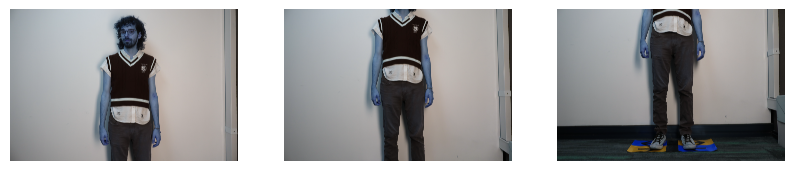

In [146]:
n_images = len(images)
fig, ax = plt.subplots(1, n_images, figsize=(10, 10/n_images))
for k, image in enumerate(images):
    ax[k].imshow(image)
    ax[k].axis('off')
print("Shape", images[0].shape)

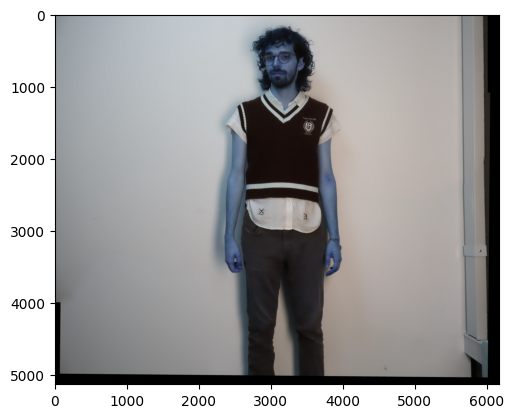

In [147]:
stitcher = cv2.Stitcher.create(cv2.Stitcher_SCANS)
images_rot = []
# for image in images:
#     rotated = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
#     images_rot.append(rotated)
status, pano = stitcher.stitch(images)

if status != cv2.Stitcher_OK:
    print("Can't stitch images, error code = %d" % status)
plt.imshow(pano)

In [3]:
from stitching.feature_detector import FeatureDetector
from stitching.feature_matcher import FeatureMatcher

In [4]:
def plot_image(img, figsize_in_inches=(5,5)):
    fig, ax = plt.subplots(figsize=figsize_in_inches)
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()
    
def plot_images(imgs, figsize_in_inches=(5,5)):
    fig, axs = plt.subplots(1, len(imgs), figsize=figsize_in_inches)
    for col, img in enumerate(imgs):
        axs[col].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

In [18]:
folder        = "examenes_oncopod/139/1/original"
output_folder = "output/opencv_stitching_original"

new_width     = 6000

images2 = st.load_and_resize_images(folder, new_width)

In [19]:
finder = FeatureDetector()
features = [finder.detect_features(img) for img in images2]
keypoints_center_img = finder.draw_keypoints(images2[1], features[1])

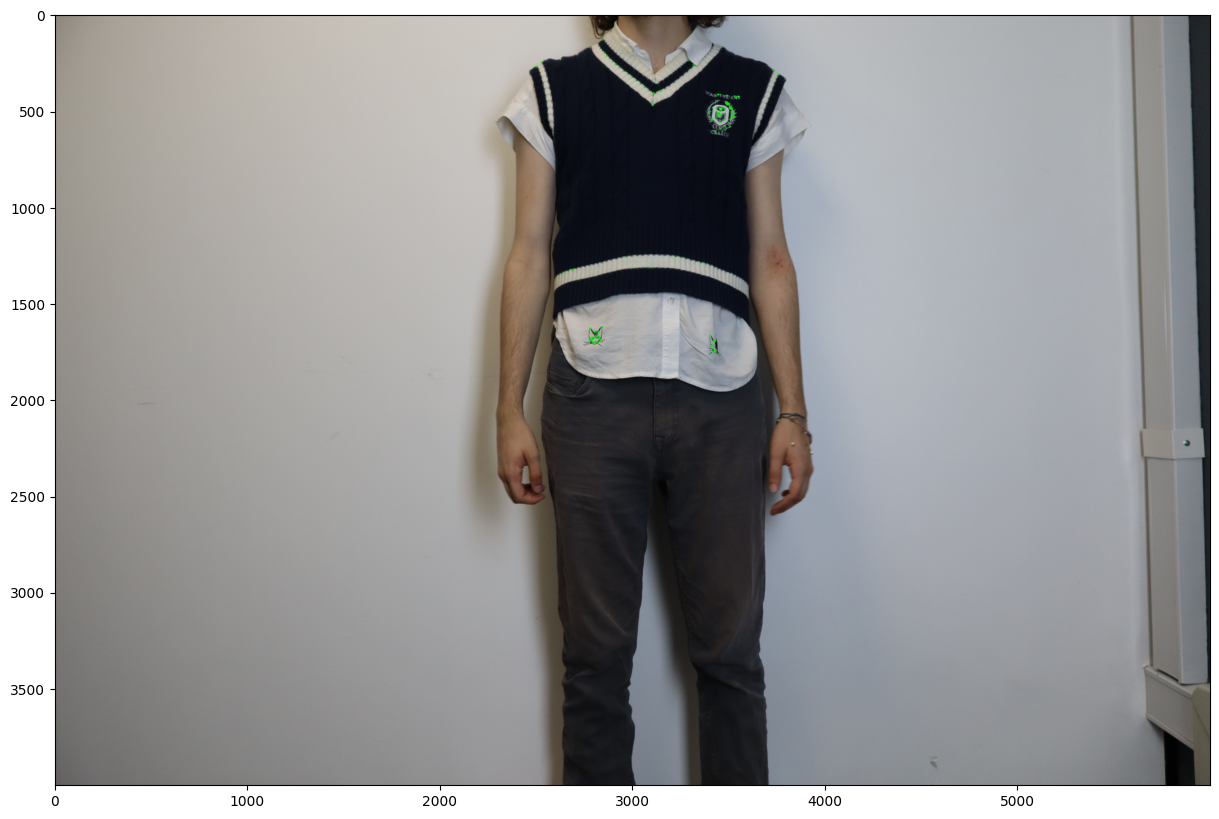

In [20]:
plot_image(keypoints_center_img, (15,10))

Matches Image 1 to Image 2


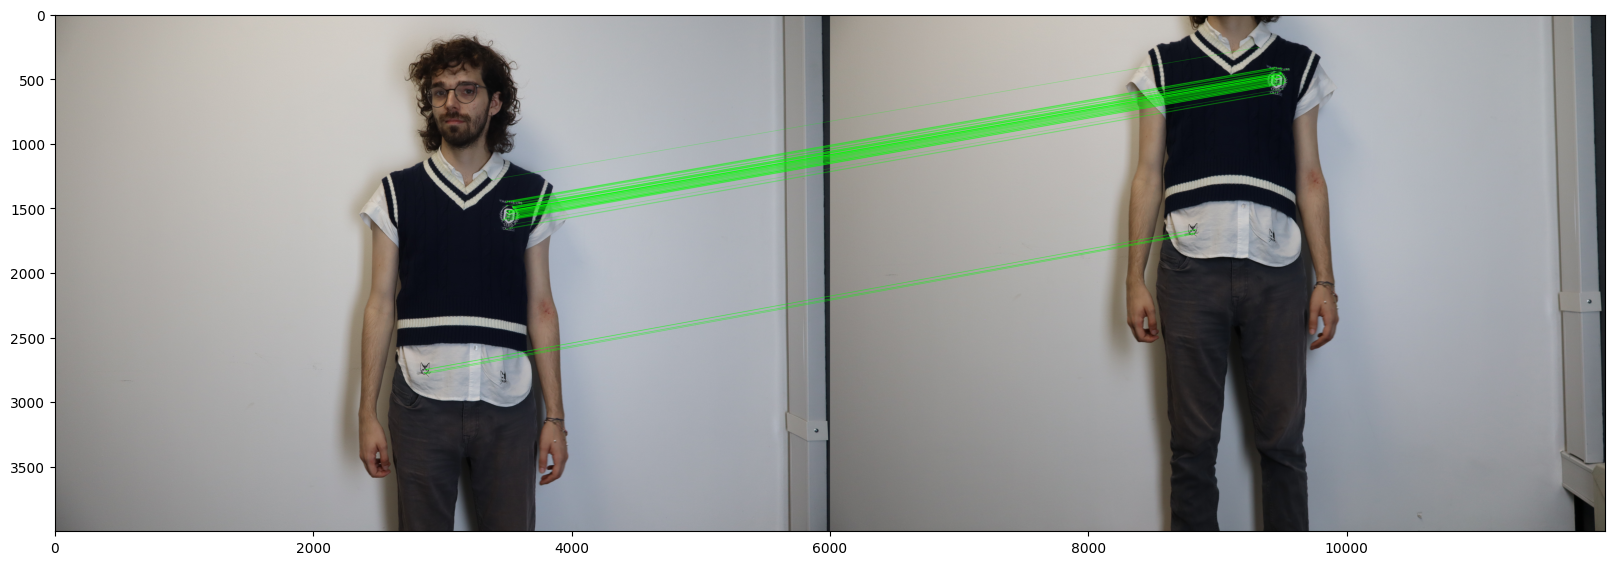

Matches Image 2 to Image 3


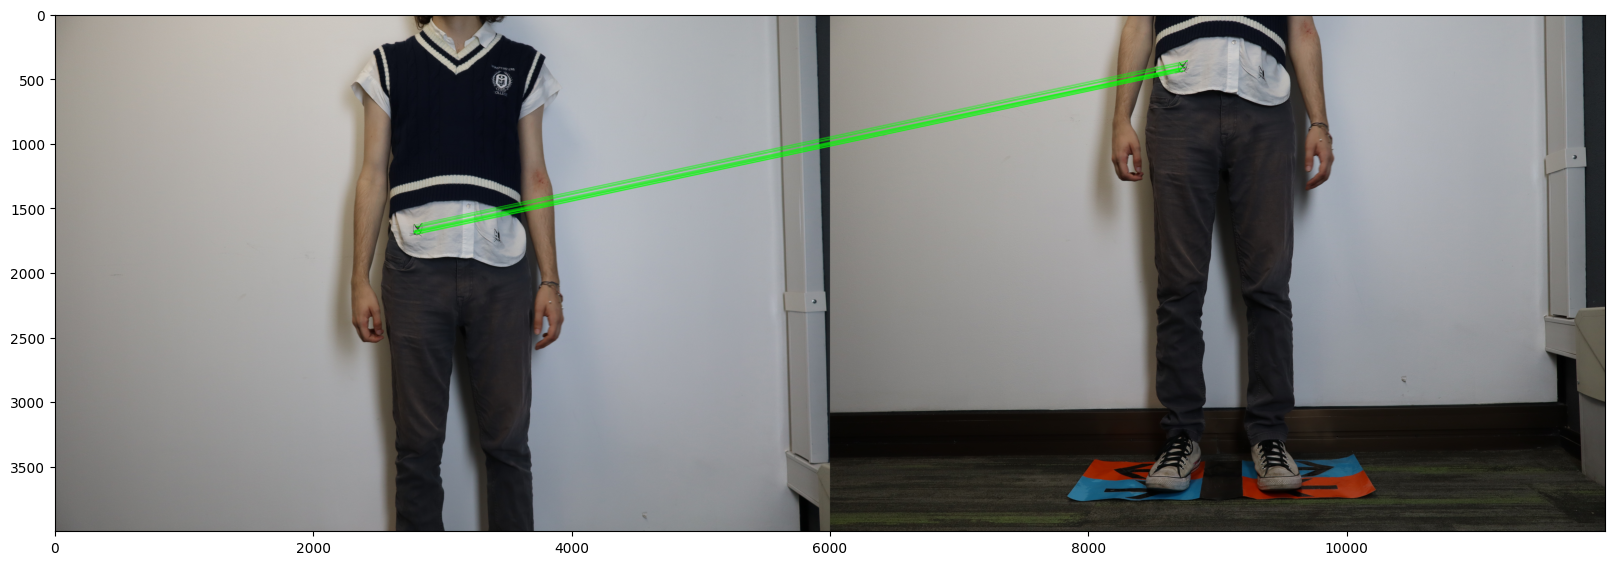

In [21]:
matcher = FeatureMatcher()
matches = matcher.match_features(features)
all_relevant_matches = matcher.draw_matches_matrix(images2, features, matches, conf_thresh=1, 
                                                   inliers=True, matchColor=(0, 255, 0))

for idx1, idx2, img in all_relevant_matches:
    print(f"Matches Image {idx1+1} to Image {idx2+1}")
    plot_image(img, (20,10))

Shape (4000, 6000, 3)


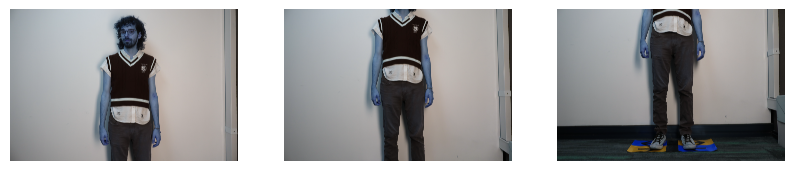

In [22]:
n_images2 = len(images2)
fig, ax = plt.subplots(1, n_images2, figsize=(10, 10/n_images2))
for k, image in enumerate(images2):
    ax[k].imshow(image)
    ax[k].axis('off')
print("Shape", images2[0].shape)

In [23]:
stitcher = Stitcher()
settings = {"detector": "sift", "confidence_threshold": 0.1}
images_rot2 = []
for image in images2:
    rotated = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
    images_rot2.append(rotated)
#stitcher = Stitcher(**settings)
panorama = stitcher.stitch(images_rot2)

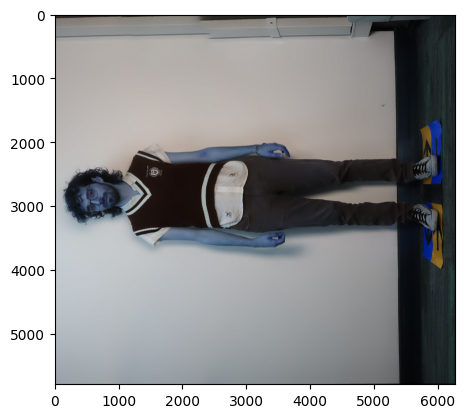

In [24]:
plt.imshow(panorama)

In [128]:
panorama = cv2.rotate(panorama, cv2.ROTATE_90_CLOCKWISE )
#pano_color = cv2.cvtColor(panorama, cv2.COLOR_RGB2BGR)
cv2.imwrite('../resultado Stitching  OpenCV/146_stitch.jpg', panorama)


True

In [3]:
folder        = "./input/138/2/original"

new_width     = 6000

images_affine = st.load_and_resize_images(folder, new_width)

In [4]:
##Stitcher con metodo Affine
settings = {"confidence_threshold": 0.4}
stitcher_affine = AffineStitcher(**settings)

images_rotAff = []
for image in images_affine:
    rotated = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
    images_rotAff.append(rotated)
panorama_affine = stitcher_affine.stitch(images_rotAff)

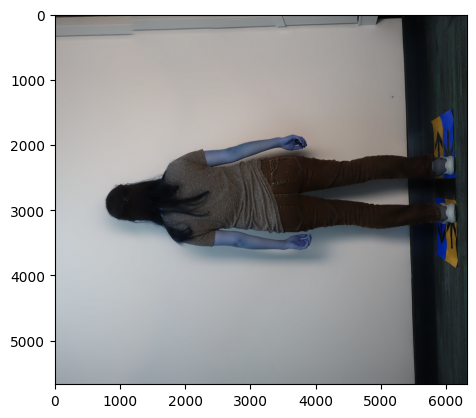

In [5]:
plt.imshow(panorama_affine)

In [6]:
panorama_affine = cv2.rotate(panorama_affine, cv2.ROTATE_90_CLOCKWISE )
#pano_color = cv2.cvtColor(panorama, cv2.COLOR_RGB2BGR)
cv2.imwrite('../resultado_Stitching _OpenCV/138_2_stitch_affine.jpg', panorama_affine)


True